<a href="https://colab.research.google.com/github/jainmridul82/Neural-Networks/blob/main/Optimization_Algorithms_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Algorithms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib import animation,rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm_notebook
from IPython.display import HTML

In [ ]:
my_cmap=mc.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
class SigmoidNeuron:

  def __init__(self,w_init,b_init,algo):
    self.w_h=[]
    self.b_h=[]
    self.e_h=[]
    self.w=w_init
    self.b=b_init
    self.algo=algo

  def sigmoid(self,x,w=None,b=None):
    if w is None:
      w=self.w
    if b is None:
      b=self.b
    return 1.0/(1.0+np.exp(-(w*x+b)))

  def error(self,X,Y,w=None,b=None):
    if w is None:
      w=self.w
    if b is None:
      b=self.b
    err=0
    for x,y in zip(X,Y):
      err+=0.5*(self.sigmoid(x,w,b)-y)**2
    return err

  def grad_w(self,x,y,w=None,b=None):
    if w is None:
      w=self.w
    if b is None:
      b=self.b
    y_pred=self.sigmoid(x,w,b)
    return (y_pred-y)*y_pred*(1-y_pred)*x

  def grad_b(self,x,y,w=None,b=None):
    if w is None:
      w=self.w
    if b is None:
      b=self.b
    y_pred=self.sigmoid(x,w,b)
    return (y_pred-y)*y_pred*(1-y_pred)

  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X,self.Y))

  def fit(self,X,Y,epochs=1,eta=1,gamma=1,mini_batch_size=1,epsilon=1,beta=1,beta1=1,beta2=1):
    self.X=X
    self.Y=Y
    self.w_h=[]
    self.b_h=[]
    self.e_h=[]

    if self.algo=="VGD":
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y)
          db+=self.grad_b(x,y)
        self.w-=eta*dw/X.shape[0]
        self.b-=eta*db/X.shape[0]
        self.append_log()

    if self.algo=="Momentum":
      v_w,v_b=0,0
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y)
          db+=self.grad_b(x,y)
        v_w=gamma*v_w+eta*dw
        v_b=gamma*v_b+eta*db
        self.w-=v_w
        self.b-=v_b
        self.append_log()

    if self.algo=="NAG":
      v_w,v_b=0,0
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        v_w=gamma*v_w
        v_b=gamma*v_b
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y,self.w-v_w,self.b-v_b)
          db+=self.grad_b(x,y,self.w-v_w,self.b-v_b)
        v_w=v_w+eta*dw
        v_b=v_b+eta*db
        self.w=self.w-v_w
        self.b=self.b-v_b
        self.append_log()

    if self.algo=="MiniBatch":
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        points_seen=0
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y)
          db+=self.grad_b(x,y)
          points_seen+=1
          if points_seen%mini_batch_size==0:
            self.w-=eta*dw/mini_batch_size
            self.b-=eta*db/mini_batch_size
            self.append_log()
            dw,db=0,0

    if self.algo=="AdaGrad":
      v_w,v_b=0,0
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y)
          db+=self.grad_b(x,y)
        v_w+=dw**2
        v_b+=db**2
        self.w-=(eta*dw)/(np.sqrt(v_w)+epsilon)
        self.b-=(eta*db)/(np.sqrt(v_b)+epsilon)
        self.append_log()

    if self.algo=="RMSProp":
      v_w,v_b=0,0
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
        dw,db=0,0
        for x,y in zip(X,Y):
          dw+=self.grad_w(x,y)
          db+=self.grad_b(x,y)
        v_w=beta*v_w+(1-beta)*dw**2
        v_b=beta*v_b+(1-beta)*db**2
        self.w-=eta*dw/(np.sqrt(v_w)+epsilon)
        self.b-=eta*db/(np.sqrt(v_b)+epsilon)
        self.append_log()

    if self.algo=="Adam":
      v_w,v_b=0,0
      m_w,m_b=0,0
      num_updates=0
      for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
        dw,db=0,0
        for x,y in zip(X,Y):
          dw=self.grad_w(x,y)
          db=self.grad_b(x,y)
          num_updates+=1
          m_w=beta1*m_w+(1-beta1)*dw
          m_b=beta1*m_b+(1-beta1)*db
          v_w=beta2*v_w+(1-beta2)*dw**2
          v_b=beta2*v_b+(1-beta2)*db**2
          m_w_c=m_w/(1-np.power(beta1,num_updates))
          m_b_c=m_b/(1-np.power(beta1,num_updates))
          v_w_c=v_w/(1-np.power(beta2,num_updates))
          v_b_c=v_b/(1-np.power(beta2,num_updates))
          self.w-=(eta/(np.sqrt(v_w_c)+epsilon))*m_w_c
          self.b-=(eta/(np.sqrt(v_b_c)+epsilon))*m_b_c
          self.append_log()

In [ ]:
X=np.asarray([3.5,0.35,3.2,-2,1.5,-0.5])
Y=np.asarray([0.5,0.50,0.5,0.5,0.1,0.3])

w_init=-6
b_init=4

algo="Adam"
animation_frames=20
plot_3d=False
plot_2d=True

epochs=200
eta=0.1
gamma=0.9
mini_batch_size=2
epsilon=1e-8
beta=0.9
beta1=0.9
beta2=0.9

w_max=5
w_min=-7

b_max=5
b_min=-5

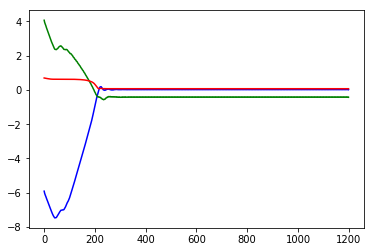

In [ ]:
sn=SigmoidNeuron(w_init,b_init,algo)
sn.fit(X,Y,epochs=epochs,eta=eta,gamma=gamma,mini_batch_size=mini_batch_size,epsilon=epsilon,beta=beta,beta1=beta1,beta2=beta2)
plt.plot(sn.w_h,'blue')
plt.plot(sn.b_h,'green')
plt.plot(sn.e_h,'red')
w_diff=[t-s for t,s in zip(sn.w_h,sn.w_h[1:])]
b_diff=[t-s for t,s in zip(sn.b_h,sn.b_h[1:])]
#plt.plot(w_diff,'b--')
#plt.plot(b_diff,'g--')
plt.show()

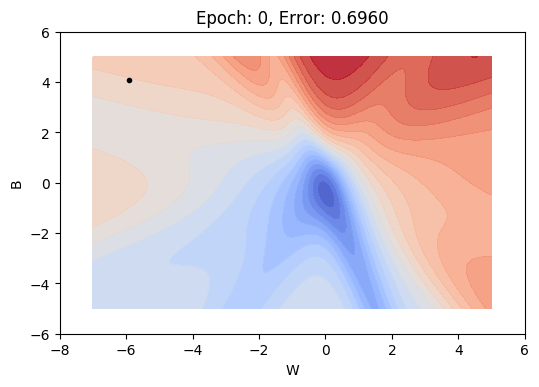

In [ ]:
if plot_2d:
    W=np.linspace(w_min,w_max,256)
    B=np.linspace(b_min,b_max,256)
    WW,BB=np.meshgrid(W,B)
    Z=sn.error(X,Y,WW,BB)
    fig=plt.figure(dpi=100)
    ax=plt.subplot(111)
    cset=ax.contourf(WW,BB,Z,25,alpha=0.9,cmap=cm.coolwarm)
    ax.set_xlabel("W")
    ax.set_ylabel("B")
    ax.set_xlim(w_min-1,w_max+1)
    ax.set_ylim(b_min-1,b_max+1)
    title=ax.set_title("Error plot")

def plot_2d_animate(i):
    i=int(i*(epochs/animation_frames))
    line.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    title.set_text("Epoch: {:d}, Error: {:.4f}".format(i,sn.e_h[i]))
    return line,title

if plot_2d:
    i=0
    line,=ax.plot(sn.w_h[:i+1],sn.b_h[:i+1],color="black",marker=".")
    anim=animation.FuncAnimation(fig,frames=animation_frames,func=plot_2d_animate)
    rc("animation",html="jshtml")
    anim

if plot_3d:
    W=np.linspace(w_min,w_max,256)
    B=np.linspace(b_min,b_max,256)
    WW,BB=np.meshgrid(W,B)
    Z=sn.error(X,Y,WW,BB)
    fig=plt.figure(dpi=100)
    ax=fig.gca(projection="3d")
    surf=ax.plot_surface(WW,BB,Z,cstride=30,rstride=30,linewidth=0,antialiased=False,cmap=cm.coolwarm,alpha=0.6)
    cset=ax.contourf(WW,BB,Z,25,zdir="z",offset=-1,cmap=cm.coolwarm,alpha=0.9)
    ax.set_xlabel("W")
    ax.set_ylabel("B")
    ax.set_zlabel("Error")
    ax.set_xlim(w_min-1,w_max+1)
    ax.set_ylim(b_min-1,b_max+1)
    ax.set_zlim(-1,np.max(Z))
    ax.dist=12
    ax.view_init(elev=25,azim=-75)
    title=ax.set_title("Error Plot")

def plot_3d_animate(i):
    i=int(i*(epochs/animation_frames))
    line1.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    line1.set_3d_properties(sn.e_h[:i+1])
    line2.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    line2.set_3d_properties(np.zeros(i+1)-1)
    title.set_text("Epoch: {:d}, Error: {:.4f}".format(i,sn.e_h[i]))
    return line1,line2,title

if plot_3d:
    i=0
    line1,=ax.plot(sn.w_h[:i+1],sn.b_h[:i+1],sn.e_h[:i+1],marker=".",color="black")
    line2,=ax.plot(sn.w_h[:i+1],sn.b_h[:i+1],np.zeros(i+1)-1,marker=".",color="red")
    anim=animation.FuncAnimation(fig,frames=animation_frames,func=plot_3d_animate)
    rc("animation",html="jshtml")
    anim

In [ ]:
anim

# All algorithms for FF Network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from tqdm import tqdm_notebook
import imageio
import warnings
import seaborn as sns
from IPython.display import HTML
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score,log_loss,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
warnings.filterwarnings("ignore")
my_cmap=mc.LinearSegmentedColormap.from_list("",["red","green","yellow"])

In [ ]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,stratify=labels,random_state=0)

In [ ]:
ohe=OneHotEncoder()
Y_ohe_train=ohe.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_ohe_test=ohe.fit_transform(np.expand_dims(Y_test,1)).toarray()

In [ ]:
W1=np.random.randn(2,2)
W2=np.random.randn(2,4)

In [ ]:
class FFNetwork:

  def __init__(self,W1,W2):
    self.params={}
    self.params["W1"]=W1.copy()
    self.params["W2"]=W2.copy()
    self.params["B1"]=np.zeros((1,2))
    self.params["B2"]=np.zeros((1,4))
    self.gradients={}
    self.update_params={}
    self.prev_update_params={}
    self.num_layers=2
    for i in range(1,self.num_layers+1):
      self.update_params["v_w"+str(i)]=0
      self.update_params["v_b"+str(i)]=0
      self.update_params["m_w"+str(i)]=0
      self.update_params["m_b"+str(i)]=0
      self.prev_update_params["v_w"+str(i)]=0
      self.prev_update_params["v_b"+str(i)]=0

  def activation(self,X):
    return 1.0/(1.0+np.exp(-X))

  def grad_activation(self,X):
    return X*(1-X)

  def softmax(self,X):
    exps=np.exp(X)
    return exps/np.sum(exps,axis=1).reshape(-1,1)

  def forward_pass(self,X,params=None):
    if params is None:
      params=self.params
    self.A1=np.matmul(X,params["W1"])+params["B1"] # (N,2)*(2,2)+(1,2)->(N,2)
    self.H1=self.activation(self.A1) # (N,2)->(N,2)
    self.A2=np.matmul(self.H1,params["W2"])+params["B2"] # (N,2)*(2,4)+(1,4)->(N,4)
    self.H2=self.softmax(self.A2) # (N,4)->(N,4)
    return self.H2

  def predict(self,X):
    Y_pred=self.forward_pass(X)
    return np.array(Y_pred).squeeze()

  def grad(self,X,Y,params=None):
    if params is None:
      params=self.params
    self.forward_pass(X,params)
    self.gradients["dA2"]=self.H2-Y # (N,4)-(N,4)->(N,4)
    self.gradients["dW2"]=np.matmul(self.H1.T,self.gradients["dA2"]) # (2,N)*(N,4)->(2,4)
    self.gradients["dB2"]=np.sum(self.gradients["dA2"],axis=0).reshape(1,-1) # (N,4)->(1,4)
    self.gradients["dH1"]=np.matmul(self.gradients["dA2"],params["W2"].T) # (N,4)*(4,2)->(N,2)
    self.gradients["dA1"]=np.multiply(self.gradients["dH1"],self.grad_activation(self.H1)) # (N,2)*(N,2)->(N,2)
    self.gradients["dW1"]=np.matmul(X.T,self.gradients["dA1"]) # (2,N)*(N,2)->(2,2)
    self.gradients["dB1"]=np.sum(self.gradients["dA1"],axis=0).reshape(1,-1) # (N,2)->(1,2)

  def fit(self,X,Y,display_loss=False,algo="VGD",epochs=1,eta=1,gamma=1,mini_batch_size=1,beta=1,beta1=1,beta2=1,epsilon=1e-8):
    if display_loss:
      loss={}
    m=X.shape[0]
    for e in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      if algo=="VGD":
        self.grad(X,Y)
        for i in range(1,self.num_layers+1):
          self.params["W"+str(i)]-=eta*self.gradients["dW"+str(i)]/m
          self.params["B"+str(i)]-=eta*self.gradients["dB"+str(i)]/m
      elif algo=="Momentum":
        self.grad(X,Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)]=gamma*self.prev_update_params["v_w"+str(i)]+eta*self.gradients["dW"+str(i)]/m
          self.update_params["v_b"+str(i)]=gamma*self.prev_update_params["v_b"+str(i)]+eta*self.gradients["dB"+str(i)]/m
          self.params["W"+str(i)]-=self.update_params["v_w"+str(i)]
          self.params["B"+str(i)]-=self.update_params["v_b"+str(i)]
        self.prev_update_params=self.update_params
      elif algo=="NAG":
        temp_params={}
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)]=gamma*self.prev_update_params["v_w"+str(i)]
          self.update_params["v_b"+str(i)]=gamma*self.prev_update_params["v_b"+str(i)]
          temp_params["W"+str(i)]=self.params["W"+str(i)]-self.update_params["v_w"+str(i)]
          temp_params["B"+str(i)]=self.params["B"+str(i)]-self.update_params["v_b"+str(i)]
        self.grad(X,Y,temp_params)
        for i in range(1,self.num_layers+1):
          self.params["W"+str(i)]=temp_params["W"+str(i)]-eta*self.gradients["dW"+str(i)]/m
          self.params["B"+str(i)]=temp_params["B"+str(i)]-eta*self.gradients["dB"+str(i)]/m
          self.update_params["v_w"+str(i)]+=eta*self.gradients["dW"+str(i)]/m
          self.update_params["v_b"+str(i)]+=eta*self.gradients["dB"+str(i)]/m
        self.prev_update_params=self.update_params
      elif algo=="MiniBatch":
        for k in range(0,m,mini_batch_size):
          self.grad(X[k:k+mini_batch_size],Y[k:k+mini_batch_size])
          for i in range(1,self.num_layers+1):
            self.params["W"+str(i)]-=eta*self.gradients["dW"+str(i)]/mini_batch_size
            self.params["B"+str(i)]-=eta*self.gradients["dB"+str(i)]/mini_batch_size
      elif algo=="AdaGrad":
        self.grad(X,Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)]=self.prev_update_params["v_w"+str(i)]+(self.gradients["dW"+str(i)]/m)**2
          self.update_params["v_b"+str(i)]=self.prev_update_params["v_b"+str(i)]+(self.gradients["dB"+str(i)]/m)**2
          self.params["W"+str(i)]-=(eta*self.gradients["dW"+str(i)]/m)/(np.sqrt(self.update_params["v_w"+str(i)])+epsilon)
          self.params["B"+str(i)]-=(eta*self.gradients["dB"+str(i)]/m)/(np.sqrt(self.update_params["v_b"+str(i)])+epsilon)
        self.prev_update_params=self.update_params
      elif algo=="RMSProp":
        self.grad(X,Y)
        for i in range(1,self.num_layers+1):
          self.update_params["v_w"+str(i)]=beta*self.prev_update_params["v_w"+str(i)]+(1-beta)*(self.gradients["dW"+str(i)]/m)**2
          self.update_params["v_b"+str(i)]=beta*self.prev_update_params["v_b"+str(i)]+(1-beta)*(self.gradients["dB"+str(i)]/m)**2
          self.params["W"+str(i)]-=(eta*self.gradients["dW"+str(i)]/m)/(np.sqrt(self.update_params["v_w"+str(i)])+epsilon)
          self.params["B"+str(i)]-=(eta*self.gradients["dB"+str(i)]/m)/(np.sqrt(self.update_params["v_b"+str(i)])+epsilon)
        self.prev_update_params=self.update_params
      elif algo=="Adam":
        self.grad(X,Y)
        for i in range(1,self.num_layers+1):
          self.update_params["m_w"+str(i)]=beta1*self.update_params["m_w"+str(i)]+(1-beta1)*self.gradients["dW"+str(i)]/m
          self.update_params["m_b"+str(i)]=beta1*self.update_params["m_b"+str(i)]+(1-beta1)*self.gradients["dB"+str(i)]/m
          self.update_params["v_w"+str(i)]=beta2*self.update_params["v_w"+str(i)]+(1-beta2)*(self.gradients["dW"+str(i)]/m)**2
          self.update_params["v_b"+str(i)]=beta2*self.update_params["v_b"+str(i)]+(1-beta2)*(self.gradients["dB"+str(i)]/m)**2
          m_w_hat=self.update_params["m_w"+str(i)]/(1-np.power(beta1,i))
          m_b_hat=self.update_params["m_b"+str(i)]/(1-np.power(beta1,i))
          v_w_hat=self.update_params["v_w"+str(i)]/(1-np.power(beta2,i))
          v_b_hat=self.update_params["v_b"+str(i)]/(1-np.power(beta2,i))
          self.params["W"+str(i)]-=eta*m_w_hat/(np.sqrt(v_w_hat)+epsilon)
          self.params["B"+str(i)]-=eta*m_b_hat/(np.sqrt(v_b_hat)+epsilon)
      if display_loss:
        Y_pred=self.predict(X)
        loss[e]=log_loss(np.argmax(Y,axis=1),Y_pred)
    if display_loss:
      plt.plot(loss.values(),"-o",markersize=5)
      plt.xlabel("Epoch")
      plt.ylabel("Log Loss")
      plt.show()

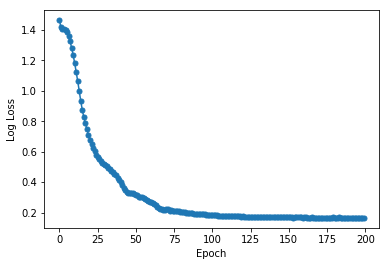

Training accuracy:  0.928
Validation accuracy:  0.94
CPU times: user 555 ms, sys: 124 ms, total: 679 ms
Wall time: 559 ms


In [ ]:
%%time
f1=FFNetwork(W1,W2)
f1.fit(X_train,Y_ohe_train,epochs=200,eta=0.1,display_loss=True,beta1=0.9,beta2=0.9,beta=0.9,algo="Adam",mini_batch_size=8,gamma=0.9)

Y_pred_train=f1.predict(X_train)
Y_pred_train=np.argmax(Y_pred_train,axis=1)

Y_pred_test=f1.predict(X_test)
Y_pred_test=np.argmax(Y_pred_test,axis=1)

train_accuracy=accuracy_score(Y_pred_train,Y_train)
test_accuracy=accuracy_score(Y_pred_test,Y_test)

print("Training accuracy: ",train_accuracy)
print("Validation accuracy: ",test_accuracy)